In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
import matplotlib.pyplot as plt
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
pop_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/1_PopChange_10_16.csv')

In [ ]:
pop_data

,Unnamed: 0,msaID,msaName,CountyID,CountyName,CBSA,MDIV,STCOU,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2016,PopChange
0,0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX",10180,NaN,NaN,NaN,NaN,165252.0,165252.0,170364.0,0.696193
1,12,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH",10420,NaN,NaN,NaN,NaN,703200.0,703203.0,702221.0,-0.031332
2,18,10500,"Albany, GA (Metropolitan Statistical Area)",13095,"Dougherty, GA",10500,NaN,NaN,NaN,NaN,157308.0,157500.0,152219.0,-0.728060
3,42,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",41043,"Linn, OR",10540,NaN,NaN,NaN,NaN,116672.0,116672.0,122849.0,1.191507
4,44,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",36001,"Albany, NY",10580,NaN,NaN,NaN,NaN,870716.0,870692.0,881839.0,0.287495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,9211,49420,"Yakima, WA (Metropolitan Statistical Area)",53077,"Yakima, WA",49420,NaN,NaN,NaN,NaN,243231.0,243237.0,249636.0,0.592633
377,9213,49620,"York-Hanover, PA (Metropolitan Statistical Area)",42133,"York, PA",49620,NaN,NaN,NaN,NaN,434972.0,434998.0,443744.0,0.453861
378,9215,49660,"Youngstown-Warren-Boardman, OH-PA (Metropolita...",39099,"Mahoning, OH",49660,NaN,NaN,NaN,NaN,565773.0,565799.0,544746.0,-0.836413
379,9227,49700,"Yuba City, CA (Metropolitan Statistical Area)",6101,"Sutter, CA",49700,NaN,NaN,NaN,NaN,166892.0,166891.0,171926.0,0.678833


In [ ]:
# #Calculate population change rate and relative change rate
# pop_data['delta'] = (pop_data['POPESTIMATE2016'] - pop_data['ESTIMATESBASE2010'])/pop_data['ESTIMATESBASE2010']
# pop_2010 = sum(pop_data['ESTIMATESBASE2010'])
# pop_2016 = sum(pop_data['POPESTIMATE2016'])
# delta = (pop_2016-pop_2010) / pop_2010
# pop_data['delta_relative'] = pop_data['delta'] /delta
# pop_data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


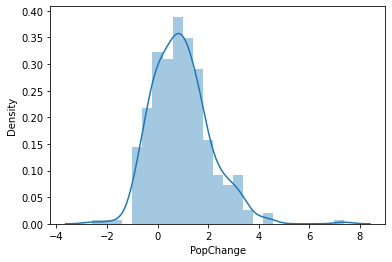

In [ ]:
import seaborn as sns, numpy as np
sns.distplot(pop_data['PopChange'])

In [ ]:
# sns.distplot(pop_data['delta_relative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


[(-2.5898341162182965, 7.365909057667085)]

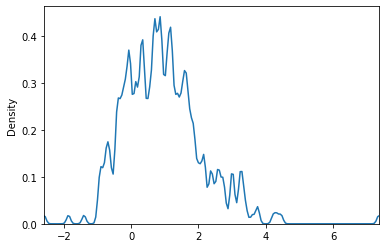

In [ ]:
data = pop_data['PopChange']
lower = pop_data['PopChange'].min()
upper = pop_data['PopChange'].max()
sns.kdeplot(np.array(data), bw = 0.05).set(xlim = (lower,upper))

In [ ]:
# data = msa_data['Agriculture']
# lower = msa_data['Agriculture'].min()
# upper = msa_data['Agriculture'].max()
# sns.kdeplot(np.array(data), bw = 0.05).set(xlim = (lower,upper))

In [ ]:
#Classification assignment
cut_labels = ['1', '2']
cut_bins = [(pop_data['PopChange'].min()-1), 0.8, (pop_data['PopChange'].max()+1)]
pop_data['new_clf'] = pd.cut(pop_data['PopChange'], bins=cut_bins, labels=cut_labels)
pop_data['new_clf'].value_counts()

2    198
1    183
Name: new_clf, dtype: int64

In [ ]:
msa_data = msa_data[['MSA','Agriculture','Mining_Oil_Gas','Utilities','Manufacturing','Transportation_Warehousing',
'Information','Finance_Insurance','Professional_Services','Management','Administrative','Educational','Health_Care','Arts_Entertainment','Public_Administration']]
msa_data.head()

,MSA,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration
0,10180,0.292018,3.878895,2.499900,0.521449,0.950696,0.699227,0.869955,0.456554,0.408331,0.414920,2.162690,1.405519,0.691371,0.921930
1,10420,0.167061,0.181680,0.000000,1.439877,0.927342,0.669126,0.793253,0.778092,2.022707,0.577252,0.666918,1.158047,0.844240,0.370126
2,10500,5.062173,0.000000,0.000000,0.973088,1.049779,0.651791,0.644427,0.838766,0.259329,0.937060,0.176275,1.304347,0.410164,0.000000
3,10540,18.157445,0.296347,0.000000,2.204625,2.081078,0.337859,0.512975,0.358836,0.243562,0.570363,0.277039,0.969812,0.296457,1.669576
4,10580,0.543236,0.012983,0.200071,0.703094,0.765197,0.960970,1.138978,1.223208,1.067423,0.489362,2.078170,1.243859,1.221169,1.022100


In [ ]:
#Merge MSA data and Population data
df = msa_data.merge(pop_data[['msaID','PopChange','new_clf']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std = df.drop(['PopChange','MSA'],axis=1)
#Standardize MSA data(first 13 columns)
for column in df_std.columns[0:14]:
    df_std[column] = (df_std[column] - np.min(df_std[column])) / (np.max(df_std[column]) - np.min(df_std[column]))

df_test = df_std
df_std

,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration,new_clf
0,0.003368,0.062860,0.291132,0.074179,0.157215,0.142061,0.109101,0.100981,0.116944,0.249392,0.402797,0.530383,0.206112,0.016799,1
1,0.001927,0.002944,0.000000,0.232753,0.152753,0.134575,0.094418,0.183507,0.579294,0.389831,0.124212,0.384805,0.251685,0.006744,1
2,0.058387,0.000000,0.000000,0.152158,0.176141,0.130264,0.065927,0.199080,0.074271,0.701114,0.032831,0.470868,0.122278,0.000000,1
3,0.209426,0.004802,0.000000,0.364793,0.373137,0.052185,0.040763,0.075900,0.069755,0.383871,0.051598,0.274073,0.088380,0.030423,2
4,0.006266,0.000210,0.023300,0.105541,0.121781,0.207159,0.160601,0.297751,0.305705,0.313794,0.387055,0.435284,0.364056,0.018625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.257761,0.001926,0.085224,0.237510,0.258517,0.091461,0.025495,0.077174,0.032158,0.216634,0.134626,0.462582,0.452180,0.017765,1
371,0.000727,0.005327,0.396097,0.331804,0.304232,0.079623,0.028444,0.116884,0.293538,0.400815,0.126815,0.274086,0.314018,0.009407,1
372,0.001154,0.011215,0.135182,0.302544,0.161364,0.098893,0.047209,0.068013,0.165500,0.472011,0.116233,0.505906,0.252741,0.007784,1
373,0.113640,0.017422,0.325725,0.104310,0.144647,0.095151,0.066874,0.149438,0.068039,0.349273,0.185491,0.459892,0.234164,0.035988,1


In [ ]:
median = df_std.median()
median['Agriculture']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0.004481571754867451

In [ ]:
for column in df_test.columns[:-1]:
  df_test[column] = df_test[column] > median[column]

In [ ]:
df_test

,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration,new_clf
0,False,True,True,False,True,True,True,False,False,False,True,True,False,True,1
1,False,True,False,True,True,True,True,True,True,False,True,False,True,False,1
2,True,False,False,False,True,True,False,True,False,True,False,True,False,False,1
3,True,True,False,True,True,False,False,False,False,False,False,False,False,True,2
4,True,False,False,False,False,True,True,True,True,False,True,True,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,True,False,False,True,True,False,False,False,False,False,True,True,True,True,1
371,False,True,True,True,True,False,False,False,True,False,True,False,True,False,1
372,False,True,True,True,True,False,False,False,True,True,False,True,True,False,1
373,True,True,True,False,False,False,False,True,False,False,True,True,False,True,1


In [ ]:
! pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square

In [ ]:
from pgmpy.models import BayesianModel
model = BayesianModel([('Agriculture', 'new_clf'), ('Mining_Oil_Gas', 'new_clf'),  ('Utilities', 'new_clf')])  # fruit -> tasty <- size

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, df_std)
print(pe.state_counts('Agriculture'))  # unconditional
print("\n")
print(pe.state_counts('new_clf'))  # conditional on fruit and size

       Agriculture
False          188
True           187


Agriculture    False                  True                
Mining_Oil_Gas False       True      False       True     
Utilities      False True False True False True False True
new_clf                                                   
1                 32   23    18   34    18   20    19   17
2                 26   11    19   25    31   27    25   30


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, df_test)
print(mle.estimate_cpd('Agriculture'))  # unconditional
print(mle.estimate_cpd('new_clf'))

+--------------------+----------+
| Agriculture(False) | 0.501333 |
+--------------------+----------+
| Agriculture(True)  | 0.498667 |
+--------------------+----------+
+----------------+-----+----------------------+
| Agriculture    | ... | Agriculture(True)    |
+----------------+-----+----------------------+
| Mining_Oil_Gas | ... | Mining_Oil_Gas(True) |
+----------------+-----+----------------------+
| Utilities      | ... | Utilities(True)      |
+----------------+-----+----------------------+
| new_clf(1)     | ... | 0.3617021276595745   |
+----------------+-----+----------------------+
| new_clf(2)     | ... | 0.6382978723404256   |
+----------------+-----+----------------------+


In [ ]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square

est = PC(df_std)

skel, separating_sets = est.build_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, separating_sets)
print("PDAG edges:       ", pdag.edges())

model = est.estimate()
print("DAG edges:        ", model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

Undirected edges:  [('Utilities', 'Management')]
PDAG edges:        [('Management', 'Utilities'), ('Utilities', 'Management')]


  0%|          | 0/5 [00:00<?, ?it/s]

DAG edges:         [('Management', 'Utilities')]


In [ ]:
from pgmpy.estimators import ExhaustiveSearch
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianModel


# Note: exhaustive search will be terribly expensive for more than a few variables
# bdeu = BDeuScore(df_std, equivalent_sample_size=5)
# k2 = K2Score(df_std)
bic = BicScore(df_std)

es = ExhaustiveSearch(df_std, scoring_method=bic)
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

In [ ]:
#Split dataframe into X(features) and y(label)
X = df_std.iloc[:,:14]
X

,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration
0,0.003368,0.062860,0.291132,0.074179,0.157215,0.142061,0.109101,0.100981,0.116944,0.249392,0.402797,0.530383,0.206112,0.016799
1,0.001927,0.002944,0.000000,0.232753,0.152753,0.134575,0.094418,0.183507,0.579294,0.389831,0.124212,0.384805,0.251685,0.006744
2,0.058387,0.000000,0.000000,0.152158,0.176141,0.130264,0.065927,0.199080,0.074271,0.701114,0.032831,0.470868,0.122278,0.000000
3,0.209426,0.004802,0.000000,0.364793,0.373137,0.052185,0.040763,0.075900,0.069755,0.383871,0.051598,0.274073,0.088380,0.030423
4,0.006266,0.000210,0.023300,0.105541,0.121781,0.207159,0.160601,0.297751,0.305705,0.313794,0.387055,0.435284,0.364056,0.018625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.257761,0.001926,0.085224,0.237510,0.258517,0.091461,0.025495,0.077174,0.032158,0.216634,0.134626,0.462582,0.452180,0.017765
371,0.000727,0.005327,0.396097,0.331804,0.304232,0.079623,0.028444,0.116884,0.293538,0.400815,0.126815,0.274086,0.314018,0.009407
372,0.001154,0.011215,0.135182,0.302544,0.161364,0.098893,0.047209,0.068013,0.165500,0.472011,0.116233,0.505906,0.252741,0.007784
373,0.113640,0.017422,0.325725,0.104310,0.144647,0.095151,0.066874,0.149438,0.068039,0.349273,0.185491,0.459892,0.234164,0.035988


In [ ]:
#Split dataframe into X(features) and y(label)
y = np.array(list(df_std.iloc[:,-1:].new_clf))
y

array(['1', '1', '1', '2', '1', '1', '1', '1', '1', '2', '2', '2', '1',
       '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '1', '1', '2',
       '1', '1', '1', '1', '2', '2', '2', '1', '1', '2', '1', '1', '2',
       '1', '2', '2', '2', '2', '2', '1', '2', '2', '1', '2', '1', '2',
       '1', '2', '1', '1', '1', '2', '2', '1', '1', '1', '2', '2', '2',
       '2', '2', '1', '1', '1', '2', '2', '1', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '1', '2', '1', '1', '2', '1', '1',
       '1', '2', '2', '2', '1', '1', '2', '2', '1', '2', '1', '1', '2',
       '1', '1', '1', '2', '1', '1', '2', '1', '2', '1', '2', '2', '2',
       '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '2', '1', '1',
       '1', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2',
       '2', '2', '1', '1', '1', '2', '1', '2', '2', '1', '1', '1', '2',
       '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '2', '1', '1',
       '1', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '2

### Now we have those MSA industries data:
### 'Agriculture','Mining_Oil_Gas','Utilities','Manufacturing','Transportation_Warehousing',
### 'Information','Finance_Insurance','Professional_Services','Management','Administrative',
### 'Educational','Health_Care','Arts_Entertainment','Public_Administration'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration
153,0.005755,0.006595,0.000000,0.119555,0.041404,0.130350,0.058983,0.154744,0.060767,0.448587,0.024632,0.530744,0.760777,0.006714
177,0.000000,0.005855,0.106231,0.115186,0.142785,0.146018,0.082673,0.125111,0.144943,0.327130,0.128227,0.649366,0.205379,0.006299
250,0.000000,0.388230,0.079081,0.092398,0.241134,0.046722,0.042010,0.072852,0.104539,0.115950,0.024082,0.159289,0.141522,0.005775
266,0.057902,0.000000,0.516075,0.453509,0.072594,0.030840,0.081932,0.031974,0.029788,0.552949,0.175179,0.420765,0.073903,0.083926
30,0.043595,0.002503,0.000000,0.244890,0.146634,0.196286,0.062312,0.155125,0.107802,0.308406,0.121522,0.226680,0.413190,0.031223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.002468,0.000000,0.000000,0.365609,0.236108,0.053397,0.120071,0.052482,0.462086,0.451679,0.269774,0.207556,0.154047,0.000000
106,0.000000,0.012199,0.000000,0.309588,0.142999,0.094370,0.057421,0.079794,0.077513,0.366070,0.236098,0.505176,0.219984,0.028680
270,0.010672,0.000535,0.158658,0.120170,0.124082,0.167492,0.203125,0.192570,0.302033,0.394360,0.251716,0.465455,0.265523,0.033864
348,0.003233,0.005761,0.194787,0.140873,0.149212,0.089110,0.092027,0.094309,0.113699,0.335702,0.124984,0.487133,0.437824,0.026872


In [ ]:
#Insample


from sklearn.decomposition import KernelPCA
#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)

feature_combination = []
acc_hist = 0
for i in range(2,10):
    for combination in list(itertools.combinations(X.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_kpca = kpca.fit_transform(X[list(combination)])
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X[list(combination)],y)
        labelPred = np.array(rbf_svc.predict(X[list(combination)]))
        acc = accuracy(labelPred,y)
        if acc > acc_hist:
            best_combination = combination
            best_acc = acc
        acc_hist = acc
    print ('{0}: {1}'.format(best_combination,best_acc))


('Health_Care', 'Arts_Entertainment'): 0.5706666666666667
('Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.6186666666666667
('Administrative', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.688
('Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.7733333333333333
('Professional_Services', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.8373333333333334
('Finance_Insurance', 'Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.912
('Information', 'Finance_Insurance', 'Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.936
('Transportation_Warehousing', 'Finance_Insurance', 'Professional_Services', 'Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'): 0.9786666666666667


In [ ]:
from sklearn.decomposition import KernelPCA
import itertools
#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)


for i in range(2,10):
    best_acc = 0
    for combination in list(itertools.combinations(X.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_train_kpca = pd.DataFrame(kpca.fit_transform(X_train[list(combination)]),columns=list(combination))
        X_test_kpca = pd.DataFrame(kpca.fit_transform(X_test[list(combination)]),columns=list(combination))
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_train_kpca,y_train)
        labelPred = np.array(rbf_svc.predict(X_test_kpca))
        acc = accuracy(labelPred,y_test)
        if acc > best_acc:
            best_combination = combination
            best_acc = acc

    print ('{0}: {1}'.format(best_combination,best_acc))

('Manufacturing', 'Health_Care'): 0.7368421052631579
('Manufacturing', 'Finance_Insurance', 'Health_Care'): 0.7631578947368421
('Mining_Oil_Gas', 'Manufacturing', 'Finance_Insurance', 'Health_Care'): 0.7631578947368421
('Agriculture', 'Manufacturing', 'Transportation_Warehousing', 'Finance_Insurance', 'Health_Care'): 0.7368421052631579
('Agriculture', 'Mining_Oil_Gas', 'Utilities', 'Information', 'Finance_Insurance', 'Professional_Services'): 0.7631578947368421
('Agriculture', 'Utilities', 'Manufacturing', 'Information', 'Professional_Services', 'Administrative', 'Educational'): 0.7631578947368421
('Mining_Oil_Gas', 'Utilities', 'Transportation_Warehousing', 'Professional_Services', 'Management', 'Administrative', 'Health_Care', 'Arts_Entertainment'): 0.7894736842105263
('Agriculture', 'Mining_Oil_Gas', 'Utilities', 'Transportation_Warehousing', 'Professional_Services', 'Management', 'Administrative', 'Health_Care', 'Arts_Entertainment'): 0.7894736842105263


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import KernelPCA
#Try combinations with two industries
feature_combination = []
acc_hist = 0

for i in range(2,10):
    highest_out_sample_score = 0
    best_param = {}
    for combination in list(itertools.combinations(X_train.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_train_kpca = kpca.fit_transform(X_train[list(combination)])
        X_test_kpca = kpca.transform(X_test[list(combination)])
        param_grid = {
            # 'n_estimators': np.arange(1,50,10),
            # 'max_depth' : np.arange(1,10,3),
            # 'max_leaf_nodes' : np.arange(1,5,1)
        }
        rf = RandomForestClassifier(n_jobs = -1)
        gr = GridSearchCV(rf, param_grid = param_grid)
        rs = gr.fit(X_train_kpca, y_train)
        if rs.score(X_test_kpca, y_test) > highest_out_sample_score:
            highest_out_sample_score = rs.score(X_test_kpca, y_test)
            best_param = rs.best_params_

        # out of sample accuracy
    print('---------------------------------------------------------------------------------')
    print('Best combinations: {0}, with parameter {1} ,out of sample score: {2}'.format(combination,rs.best_params_,highest_out_sample_score))
    print('---------------------------------------------------------------------------------')

---------------------------------------------------------------------------------
Best combinations: ('Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.7631578947368421
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Best combinations: ('Health_Care', 'Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.7894736842105263
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Best combinations: ('Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.868421052631579
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
B

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


---------------------------------------------------------------------------------
Best combinations: ('Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.868421052631579
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Best combinations: ('Professional_Services', 'Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.8947368421052632
---------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


---------------------------------------------------------------------------------
Best combinations: ('Finance_Insurance', 'Professional_Services', 'Management', 'Administrative', 'Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration'), with parameter {} ,out of sample score: 0.8947368421052632
---------------------------------------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import KernelPCA
combination = ['Educational', 'Health_Care', 'Arts_Entertainment', 'Public_Administration']
kpca = KernelPCA(kernel='rbf', n_components=len(combination))
X_train_kpca = kpca.fit_transform(X_train[list(combination)])
X_test_kpca = kpca.transform(X_test[list(combination)])
param_grid = {

        }
rf = RandomForestClassifier(n_jobs = -1)
gr = GridSearchCV(rf, param_grid = param_grid)
rs = gr.fit(X_train_kpca, y_train)

In [ ]:
gr.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
len(gr.best_estimator_.estimators_)

100

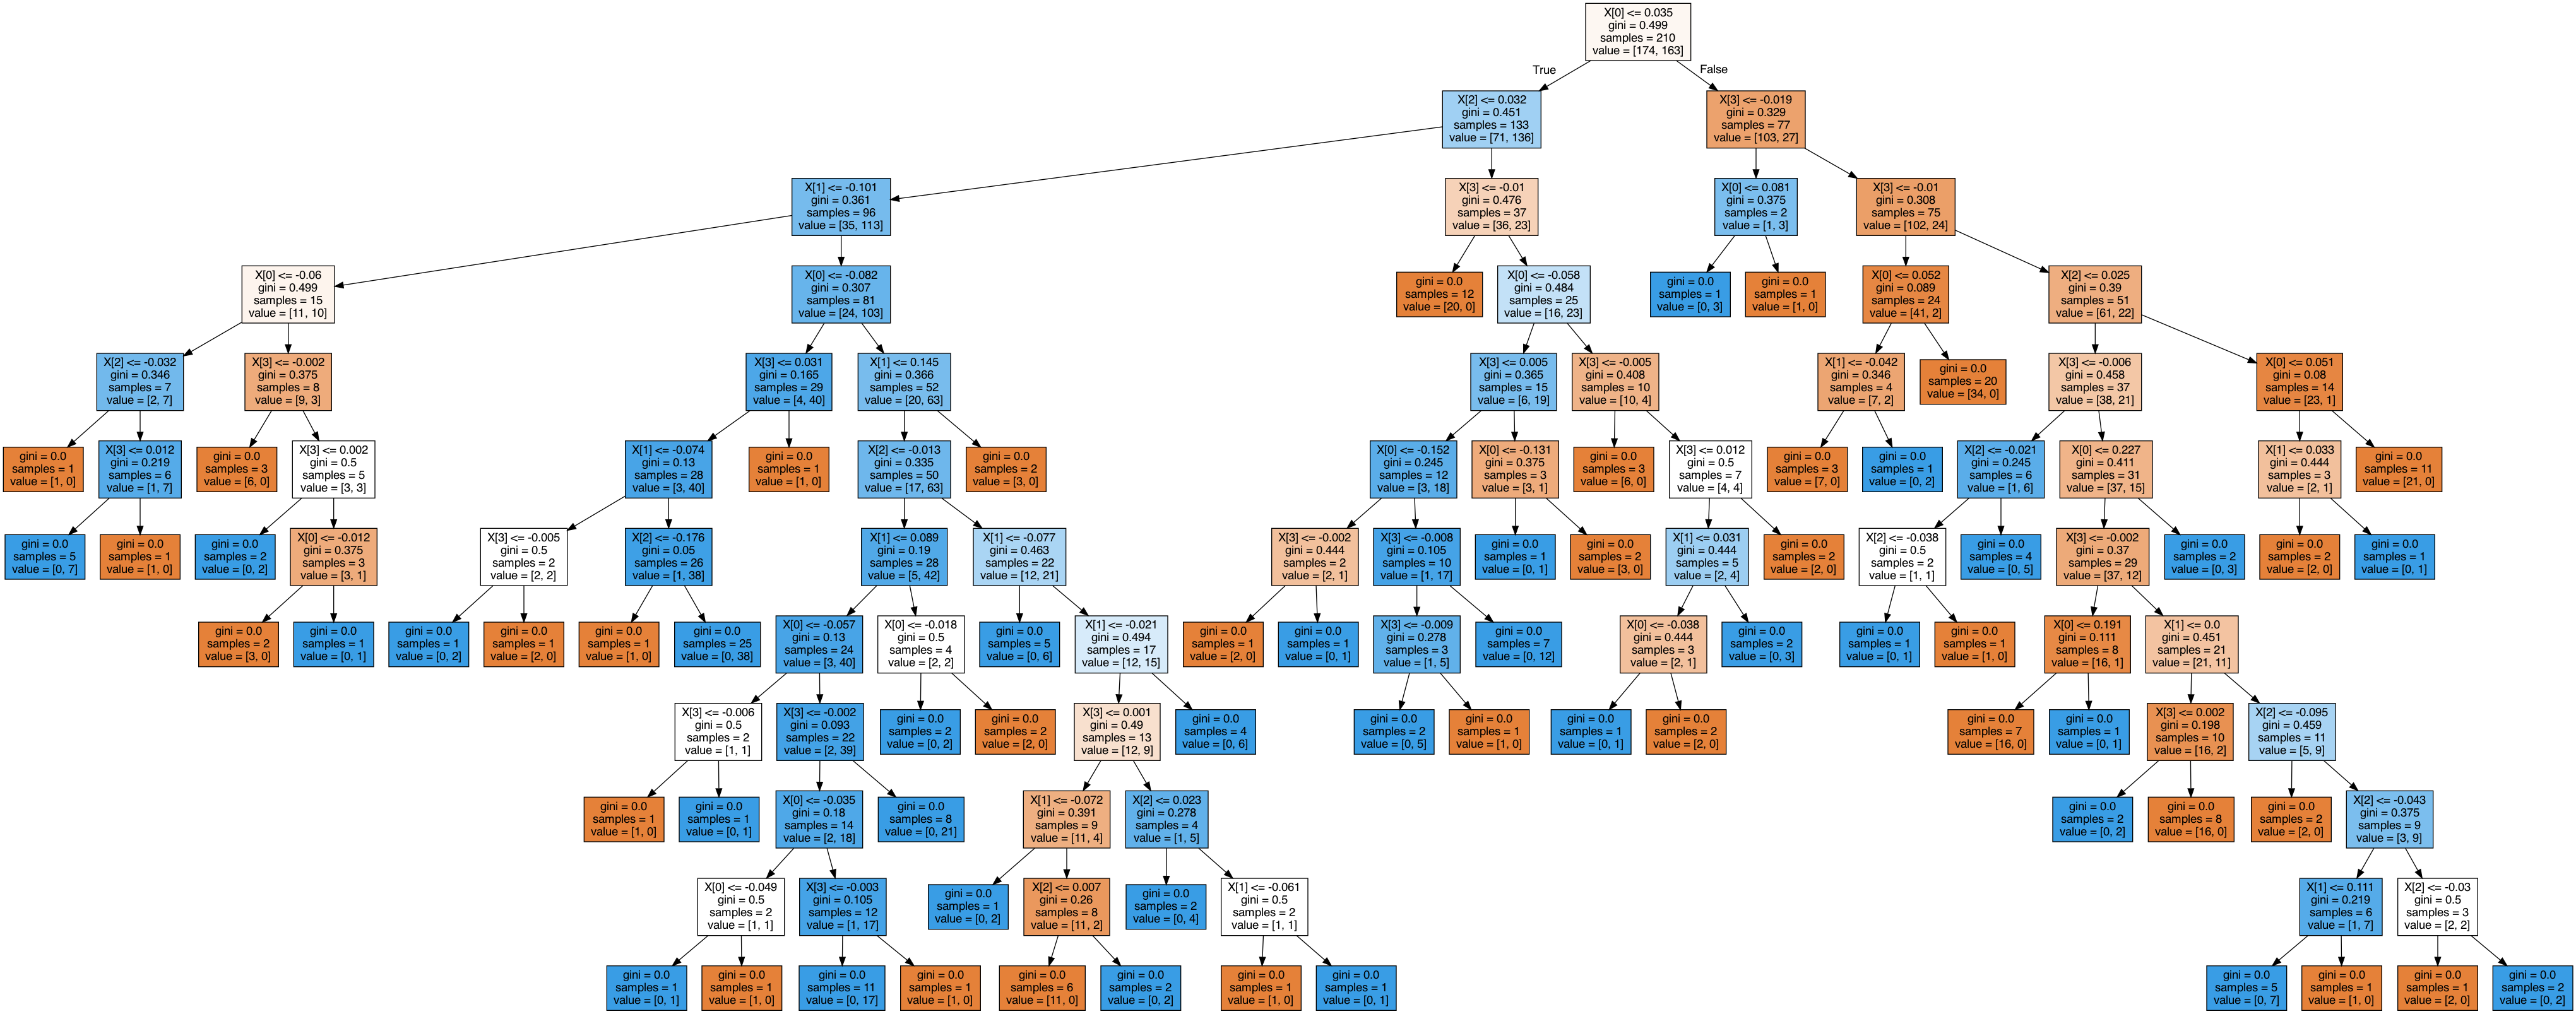

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from IPython.display import Image

export_graphviz(gr.best_estimator_.estimators_[99], out_file='tree_classifier.dot',filled=True)
!dot -Tpng tree_classifier.dot -o tree_classifier.png
Image(filename='tree_classifier.png')


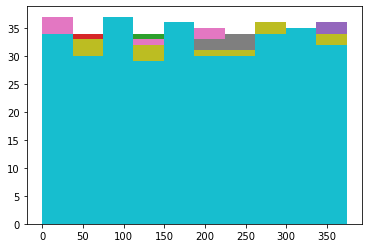

In [ ]:
########################################
import matplotlib.pyplot as plt
import random

#Bagging
bagging = list(range(0,len(df_std)))
sample = []
for i in range(10):
  y = random.sample(bagging, 327)
  sample.append(y)
for i in sample:
  plt.hist(i)

sample_list = []
for row in sample:
    for item in row:
        sample_list.append(item)
bagging = pd.DataFrame(columns=df_std.columns)
for i in sample_list:
    bagging = pd.concat([bagging,pd.DataFrame(df_std.loc[i:i],columns=df_std.columns)])
bagging_X = bagging.iloc[:,:14]
bagging_y = np.array(list(bagging.iloc[:,-1:].new_clf))

In [ ]:
from sklearn.model_selection import train_test_split
X_bag_train, X_bag_test, y_bag_train, y_bag_test = train_test_split(bagging_X, bagging_y, test_size=0.10, random_state=42)
X_bag_train

,Agriculture,Mining_Oil_Gas,Utilities,Manufacturing,Transportation_Warehousing,Information,Finance_Insurance,Professional_Services,Management,Administrative,Educational,Health_Care,Arts_Entertainment,Public_Administration
96,0.055958,0.0,0.0,0.191056,0.197844,0.102532,0.052201,0.089267,0.175054,0.351093,0.051598,0.503688,0.140242,0.015845
264,0.003585,0.001039,0.140292,0.106788,0.147357,0.202309,0.204404,0.269968,0.368021,0.478474,0.362648,0.422031,0.401887,0.011495
203,0.013874,0.182085,0.422788,0.272404,0.127239,0.081165,0.082045,0.152994,0.119907,0.390492,0.141748,0.242023,0.101576,0.013372
175,0.001649,0.002631,0.031474,0.149835,0.207086,0.271534,0.191305,0.299061,0.246905,0.52036,0.123836,0.26724,0.252976,0.024246
356,0.001957,0.000761,0.071998,0.021921,0.099998,0.298654,0.078592,0.627178,0.271765,0.658659,0.298505,0.18327,0.298096,0.020155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.005755,0.006595,0.0,0.119555,0.041404,0.13035,0.058983,0.154744,0.060767,0.448587,0.024632,0.530744,0.760777,0.006714
97,0.005066,0.005398,0.254199,0.154027,0.348886,0.142527,0.05534,0.153618,0.010247,0.371316,0.141454,0.471294,0.482062,0.037432
134,0.005842,0.001045,0.066085,0.398863,0.130486,0.092195,0.090964,0.135613,0.379953,0.549527,0.267331,0.221785,0.194992,0.011507
180,0.002146,0.002352,0.0,0.179788,0.161826,0.144789,0.113776,0.241071,0.308495,1.0,0.077209,0.288489,0.155509,0.010571


In [ ]:
from sklearn.decomposition import KernelPCA
import itertools
#Define accuracy function
def accuracy(a,b):
    right_pred = (a == b)
    return(right_pred.sum()/right_pred.size)


for i in range(2,10):
    best_acc = 0
    for combination in list(itertools.combinations(X.columns, i)):
        kpca = KernelPCA(kernel='rbf', n_components=i)
        X_bag_train_kpca = pd.DataFrame(kpca.fit_transform(X_bag_train[list(combination)]),columns=list(combination))
        X_bag_test_kpca = pd.DataFrame(kpca.fit_transform(X_bag_test[list(combination)]),columns=list(combination))
        rbf_svc = svm.SVC(kernel='rbf',gamma=1)
        rbf_svc.fit(X_bag_train_kpca,y_bag_train)
        labelPred = np.array(rbf_svc.predict(X_bag_test_kpca))
        acc = accuracy(labelPred,y_bag_test)
        if acc > best_acc:
            best_combination = combination
            best_acc = acc

    print ('{0}: {1}'.format(best_combination,best_acc))